# Day 1

## Numpy Vectorization

Most operations are done element-wise i.e. using for loops such as

In [3]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

out = []

for i in range(len(a)):
    out.append(a[i] + b[i])
out

[5, 7, 9]

The sum product of array a and b are calculated by summing each 'element' of each array, hence the term element-wise. Whereas, a vectorized operation would operate every element in the array simultaneously.

In [4]:
a + b

array([5, 7, 9])

By using vectorization, more complex arrays or other datas can be operated more effieciently thanks to **The Broadcasting Rule**. The rule states that an array can be broadcasted to another array for each missing length the first array has, but the other length of the two arrays must have the same size. An example of this is

In [5]:
A = np.array([[0, 0, 0],
             [1, 1, 1],
             [2, 2, 2],
             [3, 3, 3]])

A + b

array([[4, 5, 6],
       [5, 6, 7],
       [6, 7, 8],
       [7, 8, 9]])

It can be seen that array b is broadcasted to each row of array A. A vectorized operation can also be done by using a boolean opearot that can result in a boolean array. An example of this is shown as

In [6]:
a > 1

array([False,  True,  True])

In [7]:
A+b > 6

array([[False, False, False],
       [False, False,  True],
       [False,  True,  True],
       [ True,  True,  True]])

Sometimes the data used needs to be standardized first. It can be done by using the equation

$$
x' = \frac{x-\bar{x}}{\sigma}
$$

In [8]:
c = np.array([1, 2, 3, 4, 5, 6])

(c - c.mean())/c.std()

array([-1.46385011, -0.87831007, -0.29277002,  0.29277002,  0.87831007,
        1.46385011])

## Functions

Functions can be made in python by using the 'def' command. For each functions made there must be corresponding arguments for the function to connect a value inserted and the operation done

In [9]:
def append_list(lst, lst_val):
    for i in range(len(lst_val)):
        lst.append(lst_val[i])
    return lst

lst = ["This", "is"]
add_list = ["a", "python", "list"]


append_list(lst, add_list)
lst

['This', 'is', 'a', 'python', 'list']

There are positional arguments that can be used for functions, which are args and kwargs. args are used for taking elements from lists and kwargs are used for taking elements from a dictionary. The difference between the two of these are the operator * and ** are used for taking elements from a list and dictionary, respectively.

## Decorators

Decorators are used to add functionality to a function that is created in python. By using decorators, it won't the function that has been created. Take this decorator function as an example.

In [10]:
def decorator_func(func):
    def wrapper_func():
        print('This wrapper goes before the function below')
        return func()
    return wrapper_func

Next, we create a function to use the decorator with.

In [11]:
def some_func():
    print('This is the function')

some_func()

This is the function


By adding the decorator before the function is used, the results will be.

In [12]:
@decorator_func
def deco_func():
    print('This is the function with decorator')

deco_func()

This wrapper goes before the function below
This is the function with decorator


It is shown here that the function that we created has another functionality that can be added through the wrapper function.

## Differential Equation Analysis

### Euler Method

Euler's method for differential equation analysis is to approximate the value ODEs by iterating the differential function to its initial value. Consider the following equation.

$$
\frac{dx(t)}{dt} = f(x(t),t)
$$

Assume that the function has an initial value of $x$ = $x_0$. The euler method to find the value from the equation will be iterated with the function itself multiplied by a step size of h. The function of the approximation x* is

$$
x^*(t) = x_0 + h.f(x(t),t)
$$

The smaller the value of $h$ the more accurate it gets, but there needs to be a consideration in choosing a small $h$ because the calculation time will increase as the smaller h gets.

### Runge Kutta 4th Order

Runge Kutta approximates the value of an ODE by iterating the initial value with four values which are $k_1$, $k_2$, $k_3$, $k_4$.

$$k_1 = f(x^*(t_0), t_0) \\
k_2 = f(x^*(t_0) + k_1\frac{h}{2}, t_0 + \frac{h}{2}) \\
k_3 = f(x^*(t_0) + k_2\frac{h}{2}, t_0 + \frac{h}{2}) \\
k_4 = f(x^*(t_0) + k_3h, t_0 + h)$$

The estimation value of the ODE based on the four values of k is determined by the function below.

$$
x^*(t_0 + h) = x^*(t_0) + h.\frac{k_1 + 2k_2 + 2k_3 + k_4}{6}
$$

The method works similarly to a weighted function shown by the value that are multiplied to each $k$. 

In [13]:
# Python class for both method
class diff_eq:
    def __init__ (self, t0, x0, target, step):
        self.t0 = t0
        self.x0 = x0
        self.target = target
        self.h = step
        self.xval = 0
        print("Values received")
        
    # Euler Method
    def euler(self, function):
        # Initiate the value of x
        self.xval = self.x0
        
        # Iterate until the value of t reaches the target t
        while self.t0 < self.target:
            self.xval = self.xval + self.h*function(self.t0, self.x0)
            self.t0 = self.t0 + self.h
        # Returns the value of x
        return self.xval
        
    # Runge Kutta 4th Order Method
    def rk4(self, function):
        # Number of iterations based on step size
        self.n = int((self.target - self.t0)/self.h)
        # Initiate the value of x
        self.xval = self.x0
            
        # Iterate until the value of t reaches the target t
        for i in range(1, self.n+1):
            # Runge Kutta formulas for each k
            k1 = self.h * function(self.t0, self.xval) 
            k2 = self.h * function(self.t0+0.5*self.h, self.xval+0.5*k1) 
            k3 = self.h * function(self.t0+0.5*self.h, self.xval+0.5*k2) 
            k4 = self.h * function(self.t0+self.h, self.xval+k3)
            
            # Update values
            self.xval = self.xval + 1.0*(k1 + 2 * k2 + 2 * k3 + k4)/6.0
            self.t0 = self.t0 + self.h
        return self.xval

In [14]:
def dxdy(t, x):
    return ((t - x)/2)

# Euler method test
euval = diff_eq(0, 1, 2, 0.2)
print("The value by using euler method: " + str(euval.euler(dxdy)))

# Runge kutta method test
rkval = diff_eq(0, 1, 2, 0.2)
print("The value by using runge kutta method: " + str(rkval.rk4(dxdy)))

Values received
The value by using euler method: 0.9999999999999999
Values received
The value by using runge kutta method: 1.1036393232374955


# Day 2

## Truncation Error

Assume that there exists an equation of x which is stated as

$$
x' = \frac{dx}{dt} = f(x,t)
$$

When using the euler method for calculating the approximation value of x, there will be an error generated because of the approximation. The error generated is called as the **Truncation Error**. For the equation above, the truncation error by using the euler method for approximation for each step of iteration is stated as

$$
O(h^2) = \frac{h^2}{2}x''(\tilde{t_i})
$$

Where the value of x'' is the second order derivation of x by t, or in other form it is stated as

$$
x''(t_i) = f_t(t,x(t)) + f_x(t,x(t))f(t,x(t))
$$

$f_t$ and $f_x$ are both the partial derivation of the equation by t and x respectively. The value of $\tilde{t_i}$ is the number between $x_i$ and $x_{i+1}$, hence

$$
\tilde{x_i} = \frac{x_{i+1}-x_i}{2}
$$

Seeing that $x'$ is equal to $f(x,t)$, hence the formula of $O(h^2)$ can also be written as

$$
O(h^2) = \frac{h^2}{2}f'(x_i,t_i)
$$

The truncation error of the euler method is defined by $O(h^2)$. Whereas for a higher order the truncation error, say an order of $n$, it would change the truncation error equation to $O(h^{n+1})$. The formula of $O(h^n)$ is stated as

$$
O(h^n) = \frac{h^n}{n!}f^{(n-1)}(x_i,t_i)
$$

Referring back to the RK4 method, based on its name, we can determine that it would have a truncation error of $n+1$ based on its order. Hence, the truncation error of the RK4 method would be $O(h^5)$.

## Numba Test

In [15]:
import numpy as np
from numba import njit, jit

# Euler Method
def euler(t0, x0, target, h, function):
    # Initiate the value of x
    xval = x0
    
    # Iterate until the value of t reaches the target t
    while t0 < target:
        xval = xval + h*function(t0, x0)
        t0 = t0 + h
    # Returns the value of x
    return xval

@njit
def eu_dec(t0, x0, target, h, function):
    # Initiate the value of y
    xval = x0
        
    # Iterate until the value of x reaches the target x
    while t0 < target:
        xval = xval + h*function(t0, x0)
        t0 = t0 + h
    # Returns the value of y
    return xval

@njit
def func(t, x):
    return((t-x)/2)

# First compile with random inputs
eu_dec(1, 1, 2, 0.5, func)

1.125

In [16]:
%timeit euler(0, 1, 7, 0.05, func)

42.1 µs ± 2.87 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%timeit eu_dec(0, 1, 7, 0.05, func)

10.6 µs ± 509 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Day 3

## Transfer Function

Consider the following transfer function.

$$
\displaystyle{G(s) = \frac{1}{s^3+3s^2+2s+1}}
$$

By using the control library, the transfer function will now be simulated to check the step response.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import control as co
from numba import njit, jit, prange
%matplotlib inline

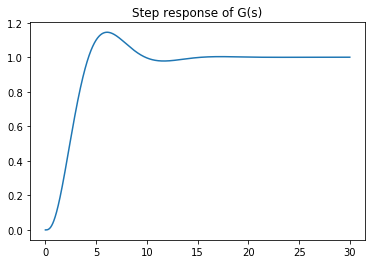

In [19]:
# Create the transfer function
sys = co.tf([1],[1, 3, 2, 1])

# Define the time interval 0.01 s time step
t = np.arange(int(30/0.01))*0.01

# Plot the step response of the system
T, yout = co.step_response(sys, t)
plt.title("Step response of G(s)")
plt.plot(T, yout)
plt.show()

## Dynamics

Next, the dynamics of the system will be simulated by creating a function based on the state space equation of G(s). Consider that the state space equation of the system is written as
$$
\dot{\mathbf{x}} = \mathbf{A}\mathbf{x} + \mathbf{B}\mathbf{u}
$$
$$
\mathbf{y} = \mathbf{C}\mathbf{x} + \mathbf{D}\mathbf{u}
$$

In [20]:
# Change from s-domain to state space
sys_ss = co.tf2ss(sys)
sys_ss

A = [[-3. -2. -1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]]

B = [[1.]
 [0.]
 [0.]]

C = [[0. 0. 1.]]

D = [[0.]]

Based on the values of A, B, C, and D, the dynamics of the system can now be determined.

In [21]:
A = np.array(sys_ss.A)
B = np.array(sys_ss.B)
C = np.array(sys_ss.C)
D = np.array(sys_ss.D)

def dynamics(x, u):
    # Apply the state space equation for x dot
    x_dot = np.ravel(np.dot(A, x))+ np.ravel(np.dot(B, u))
    
    return x_dot

# Create a jitted function of the original dynamics function
dynamics_jitted = njit(dynamics)

In [22]:
# Compile the jitted function
# Use float to ensure the function will accept float as inputs
_ = dynamics_jitted(np.arange(3)*1.0, np.array([2.0]))

In [23]:
# Time test for both method
%timeit dynamics(np.arange(3)*1.0, np.array([3.0]))
%timeit dynamics_jitted(np.arange(3)*1.0, np.array([3.0]))

10.2 µs ± 291 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.18 µs ± 186 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Euler Method

Based on the dynamics function, now the value of $\dot{x}$ can be approximated by using the euler method.

In [24]:
def sim_euler(t, u, x0):
    # Initialize the output
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))
    
    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))
    
    for i in range(t.shape[0] - 1):
        x[i+1] = x[i] + (t[i+1]-t[i])*dynamics(x[i], u[i])
        y[i+1] = np.ravel(np.dot(C, x[i+1])) + np.ravel(np.dot(D, u[i]))

    return x, y

# Test the output of the function
a = 1.0*np.arange(10)
b = 2.0*np.ones((10,1))
c = 0.0*np.zeros((3,1))
out1, out2 = sim_euler(a, b, c)
print(out1.shape)
print(out2.shape)

(10, 3)
(10, 1)


In [25]:
# Create a jitted function based on the euler method function
@njit
def sim_euler_jitted(t, u, x0):
    # Don't forget to initialize the output
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))

    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))

    for i in range(t.shape[0] - 1):
        x[i+1] = x[i] + (t[i+1]-t[i])*dynamics_jitted(x[i], u[i])
        y[i+1] = np.ravel(np.dot(C, x[i+1])) + np.ravel(np.dot(D, u[i]))

    return x, y

# Compile the jitted function and use float as inputs
_ = sim_euler_jitted(a, b, c)

In [26]:
# Time test for both methods
t = np.arange(int(30/0.01))*0.01 # 30 seconds with 0.01 s time-step
u = np.ones((t.shape[0], 1)) # Step Input
x0 = np.zeros((3, 1))

%timeit _ = sim_euler(t, u, x0)
%timeit _ = sim_euler_jitted(t, u, x0)

53.2 ms ± 1.51 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.77 ms ± 210 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
_, result_euler = sim_euler(t, u, x0)
_, result_euler_jitted = sim_euler_jitted(t, u, x0)

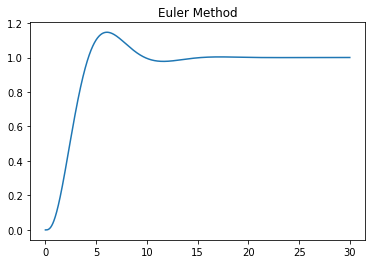

In [28]:
plt.plot(t, result_euler)
plt.title("Euler Method")
plt.show()

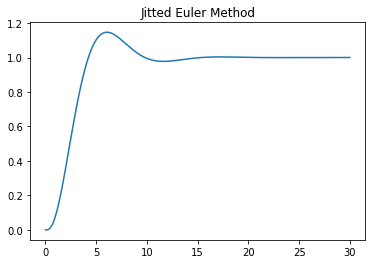

In [29]:
plt.plot(t, result_euler_jitted)
plt.title("Jitted Euler Method")
plt.show()

## Runge Kutta 4th Order Method

To approximate using the runge kutta method first the function will be defined below.

In [30]:
def sim_rk4(t, u, x0):
    # Initialize the output
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))
    
    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))
    
    for i in range(t.shape[0] - 1):
        h = t[i+1]-t[i]
        k1 = h*dynamics(x[i], u[i])
        k2 = h*dynamics(x[i]+k1*h/2, u[i])
        k3 = h*dynamics(x[i]+k2*h/2, u[i])
        k4 = h*dynamics(x[i]+k3*h, u[i])
        
        x[i+1] = x[i] + 1.0*(k1 + 2*k2 + 2*k3 + k4)/6.0
        y[i+1] = np.ravel(np.dot(C, x[i+1])) + np.ravel(np.dot(D, u[i]))

    return x, y

# Test the output of the function
a = 1.0*np.arange(10)
b = 2.0*np.ones((10,1))
c = 0.0*np.zeros((3,1))
out1, out2 = sim_rk4(a, b, c)
print(out1.shape)
print(out2.shape)

(10, 3)
(10, 1)


In [31]:
@njit
def sim_rk4_jitted(t, u, x0):
    # Initialize the output
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))
    
    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))
    
    for i in range(t.shape[0] - 1):
        h = t[i+1]-t[i]
        k1 = h*dynamics_jitted(x[i], u[i])
        k2 = h*dynamics_jitted(x[i]+k1*h/2, u[i])
        k3 = h*dynamics_jitted(x[i]+k2*h/2, u[i])
        k4 = h*dynamics_jitted(x[i]+k3*h, u[i])
        
        x[i+1] = x[i] + 1.0*(k1 + 2*k2 + 2*k3 + k4)/6.0
        y[i+1] = np.ravel(np.dot(C, x[i+1])) + np.ravel(np.dot(D, u[i]))

    return x, y

In [32]:
# Time test for both methods
t = np.arange(int(30/0.01))*0.01 # 30 seconds with 0.01 s time-step
u = np.ones((t.shape[0], 1)) # Step Input
x0 = np.zeros((3, 1))

%timeit _ = sim_rk4(t, u, x0)
%timeit _ = sim_rk4_jitted(t, u, x0)

196 ms ± 24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
12.8 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit _ = sim_euler(t, u, x0)
%timeit _ = sim_euler_jitted(t, u, x0)

58.7 ms ± 6.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.71 ms ± 156 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


It can be seen here that the RK4 method has a bit of disadvantage on the total running time, but the overall time difference between using a jitted function and the original function, the RK4 method is more efficient than the euler method.

In [34]:
_, result_rk4 = sim_euler(t, u, x0)
_, result_rk4_jitted = sim_euler_jitted(t, u, x0)

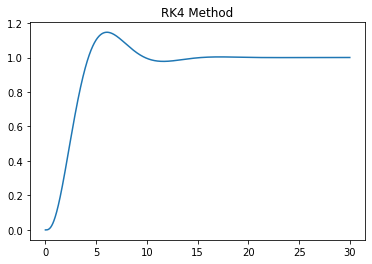

In [35]:
plt.plot(t, result_rk4)
plt.title("RK4 Method")
plt.show()

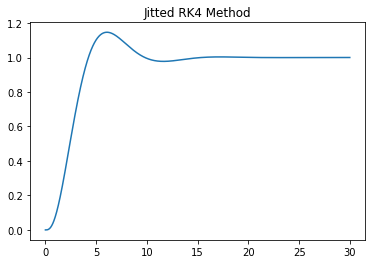

In [36]:
plt.plot(t, result_rk4_jitted)
plt.title("Jitted RK4 Method")
plt.show()

# Day 4

## Multi-Sim Euler Method

By creating a new function, the euler method can be done multiple times to simulate a change of input size. The function that will be used to iterate the euler method for a number of times is defined below. Another addition to the function is that the 'for' uses prange as a parameter to ensure that the jitted function can be run parallelly. By setting the jitted function to parallel, each iteration in the 'for' range will be run parallel to each other.

In [37]:
def multi_sim_euler(t, u, x0):
    # Define the output with one extra dimension as the iteration of multiple simulation
    x = np.empty((t.shape[0], t.shape[1], x0.shape[1]))
    y = np.empty((t.shape[0], t.shape[1], 1))
    
    for i in prange(t.shape[0]):
        x[i], y[i] = sim_euler_jitted(t[i], u[i], x0[i])
        
    return x, y

# Define a random input for compiling
t = np.tile(np.arange(int(30/0.01))*0.01,(10, 1))
print(t.shape)
x0 = np.tile(np.zeros((1, 1)), (10, 3, 1))
print(x0.shape)
u = np.tile(np.ones((t.shape[1], 1)),(10, 1, 1)) # Step Input
print(u.shape)

multi_sim_euler_jitted = njit(multi_sim_euler)
multi_sim_euler_jitted_parallelized = njit(multi_sim_euler, parallel = True)

_ = multi_sim_euler_jitted(t, u, x0) 
_ = multi_sim_euler_jitted_parallelized(t, u, x0) 

(10, 3000)
(10, 3, 1)
(10, 3000, 1)


In [38]:
t = np.tile(np.arange(int(300/0.01))*0.01,(10, 1))
print(t.shape)
x0 = np.tile(np.zeros((1, 1)), (10, 3, 1))
print(x0.shape)
u = np.tile(np.ones((t.shape[1], 1)),(10, 1, 1)) # Step Input
print(u.shape)

# Create a step input u with values that ranges from 1 to 10
for i in range(u.shape[0]):
    u[i] = u[i]*i+1

%timeit multi_sim_euler_jitted(t, u, x0)
%timeit multi_sim_euler_jitted_parallelized(t, u, x0)

(10, 30000)
(10, 3, 1)
(10, 30000, 1)
472 ms ± 5.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
329 ms ± 18.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
x, y = multi_sim_euler_jitted_parallelized(t, u, x0) 

After obtaining the data by using the multi sim euler function, next the data will be plotted on one chart for comparison

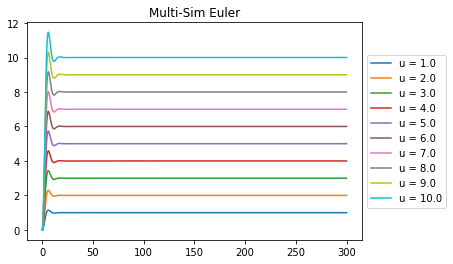

In [40]:
label = ["1.0", "2.0", "3.0", "4.0", "5.0", "6.0",
        "7.0", "8.0", "9.0", "10.0"]

plt.figure()
plt.title("Multi-Sim Euler")
for i in range(t.shape[0]):
    plt.plot(t[i], y[i], label = str("u = ") + label[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Day 5

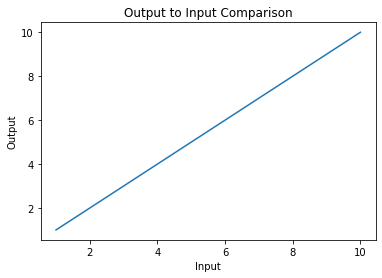

In [41]:
plt.title('Output to Input Comparison')
plt.plot(u[:,-1,0], y[:,-1,0])
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

Based on the plot above, the last data from the output array is plotted in comparison to the input size. It can be seen that when the input is increased linearly so does the output.

# Day 6

## Particle Swarm Optimization

To understand Particle Swarm Optimization (PSO), we must first understand about gradient optimization. Every function has a global minima and we can find the value of it by using a gradient descent, but when there's a local minima that are located randomly around the global minima, gradient descent would fail at obtaining the global minima. To ensure that there would be no failure in identifying the global minima, we need to create a gradient-free optimizer. Gradient-Free Optimization uses methods that mimic certain mechanisms in nature, one of which is swarming. The implementation of optimization using a swarming method is called as the PSO. PSO doesn't use gradient descent and it can solve both linear and non-linear problems. PSO uses particles as a source of information, precisely their position and velocity. Both information are used for updating the value that is searched. The formulation for the position update is

$$
x^{i}_{k+1} = x^{i}_{k} + v^{i}_{k+1}\Delta t
$$

Whereas for the velocity the formulation for updating its value is

$$
v^{i}_{k+1} = wv^{i}_{k} + c_{1}r_{1}\frac{p^{i}_{k} - x^{i}_{k}}{\Delta t} + c_{2}r_{2}\frac{p^{g}_{k} - x^{i}_{k}}{\Delta t}
$$

* $r_1$ and $r_2$ are both random number between [0,1]
* $p^{i}_{k}$ is the particle's best position at interval $k$ and $p^{g}_{k}$ is the swarm's best position at interval $k$
* $c_1$ is the confidence for the particle and $c_2$ is the confidence for the swarm
* $w$ is the inertia

Another fact that we can observe through the equation is by subtituting the velocity update function to the position update function. By doing so, we can obtain 

$$
x^{i}_{k+1} = x^{i}_{k} + wv^{i}_{k}\Delta t + c_{1}r_{1}(p^{i}_{k} - x^{i}_{k}) + c_{2}r_{2}(p^{g}_{k} - x^{i}_{k})
$$

$$
x^{i}_{k+1} = x^{i}_{k} + wv^{i}_{k}\Delta t + (c_{1}r_{1} + c_{2}r_{2}) \left(\frac{c_{1}r_{1}p^{i}_{k} + c_{2}r_{2}p^{g}_{k}}{c_{1}r_{1} + c_{2}r_{2}} - x^{i}_{k}\right)
$$

Comparing the equation above with the line-search function which is defined as

$$
x_{k+1} = x_{k} + \alpha_{k}p_{k}
$$

We can see that the three different parts of the equation represents a part of the line-search function

* $x^{i}_{k} + wv^{i}_{k}\Delta t$ equals to $x_{k+1}$

* $(c_{1}r_{1} + c_{2}r_{2})$ equals to $\alpha_{k}$

* $\left(\frac{c_{1}r_{1}p^{i}_{k} + c_{2}r_{2}p^{g}_{k}}{c_{1}r_{1} + c_{2}r_{2}} - x^{i}_{k}\right)$ equals to $p_{k}$

Hence, we can say that each particle searches the value based on a line-search with a stochastic step size ($r_1$ and $r_2$ are random numbers) and search direction (again there are $r_1$ and $r_2$ components).

# Day 7 - 8

## Case Study

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import random
import math
from numba import njit, jit, prange
%matplotlib inline

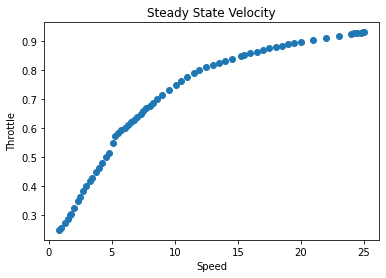

In [15]:
df = pd.read_csv("../projects/resources/steady_state_velocity.csv")
v0 = np.array(df.speed[1:])
u0 = np.array(df.throttle[1:])

plt.title('Steady State Velocity')
plt.xlabel('Speed')
plt.ylabel('Throttle')
plt.scatter(v0, u0)
plt.show()

Based on the graph above, the PSO algorithm will use a cost function based on the equation below

$$
\hat{u}_{s} = \beta_{1}(1-e^{-\beta_{2}v_{s}})
$$

In [33]:
def ev_func(beta):
    u = beta[0]*(1.0 - np.exp(-beta[1]*v0))
    return u

In [34]:
def cost(beta):
    u = beta[0]*(1.0 - np.exp(-beta[1]*v0))
    err = u0 - u
    return np.mean(err**2)

In [39]:
def PSO(c_func, n_param, particles, rng, iterate_max):
    # Define the constants
    w = 0.5
    c1 = 0.8
    c2 = 0.7
    iterate = 0
    
    # Setup the initial conditions for position and velocity arrays
    ppos_vector = np.random.uniform(0, rng, (particles, n_param))
    pbest_pos = ppos_vector
    pfit_value = np.ones(particles) * 1e100
    gbest_pos = np.zeros(n_param)
    gfit_value = 1e100
    pvel_vector = np.zeros((particles, n_param))
    
    # First loop for assigning the fitness value using the cost function
    for i in range(particles):
        # Check the position of individual and group value using the evaluation function
        cost_func = c_func(ppos_vector[i])
        
        # Update each values using the cost functions
        if(pfit_value[i] > cost_func):
            pfit_value[i] = cost_func
            pbest_pos[i] = np.copy(ppos_vector[i])
                
        if(gfit_value > cost_func):
            gfit_value = cost_func
            gbest_pos = np.copy(ppos_vector[i])
        
    # Second loop for implementing the PSO Algorithm
    while (iterate < iterate_max):
        for i in range(particles):
            # Update the velocity and position vector
            pvel_vector[i] = w*pvel_vector[i] + c1*random.random()*(pbest_pos[i]-ppos_vector[i]) + c2*random.random()*(gbest_pos-ppos_vector[i])
            ppos_vector[i] = pvel_vector[i] + ppos_vector[i]
            
            cost_func = c_func(ppos_vector[i])
            
            # Update each values using the cost functions
            if(pfit_value[i] > cost_func):
                pfit_value[i] = cost_func
                pbest_pos[i] = np.copy(ppos_vector[i])
                
            if(gfit_value > cost_func):
                gfit_value = cost_func
                gbest_pos = np.copy(ppos_vector[i])
                
        iterate = iterate+1
    
    print(c_func(gbest_pos))
    print("The best position for each parameter: ", gbest_pos, " with ", iterate, " iteration.")
    return ppos_vector, gbest_pos

In [41]:
pv, gp = PSO(cost, 2, 25, 2, 2000)

0.000943064934149522
The best position for each parameter:  [0.91346753 0.18324299]  with  2000  iteration.


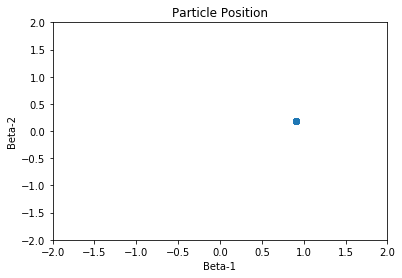

In [161]:
plt.title("Particle Position")
plt.xlabel("Beta-1")
plt.xlim(-2,2)
plt.ylabel("Beta-2")
plt.ylim(-2,2)
plt.scatter(pv[:,0], pv[:,1])
plt.show()

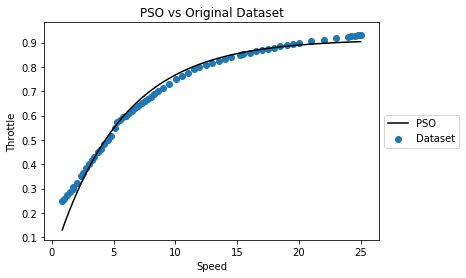

In [162]:
plt.title('PSO vs Original Dataset')
plt.xlabel('Speed')
plt.ylabel('Throttle')
plt.plot(v0, ev_func(gp), label='PSO', color='k')
plt.scatter(v0, u0, label='Dataset')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Based on the graph above it can be seen that by using the PSO algorithm, we can determine the values of $\beta_{1}$ and $\beta_{2}$ to find the function that can represent the dataset. Next, the PSO will be used to find the values based on the equation below

$$
\hat{u}_{s} = \beta_{1}(1-e^{-\beta_{2}v_{s}^{\beta_3}-\beta_{4}v_{s}^{\beta_5}})
$$

In [149]:
def ev_func_5(beta):
    u = beta[0]*(1.0 - np.exp(-beta[1]*v0**(beta[2])-beta[3]*v0**beta[4]))
    return u

In [207]:
pv4, gp4 = PSO(ev_func_5, 5, 30, 2, 5000)

0.00022433278656880317
The best position for each parameter:  [ 1.03506859 -0.55894933  0.92404573  0.78311663  0.88035065]  with  5000  iteration.


In [241]:
def ev_func_5_test(beta, v0):
    u = beta[0]*(1.0 - np.exp(-beta[1]*v0**(beta[2])-beta[3]*v0**beta[4]))
    return u

In [242]:
ev_func_5_test(gp4, 0.0)

0.0

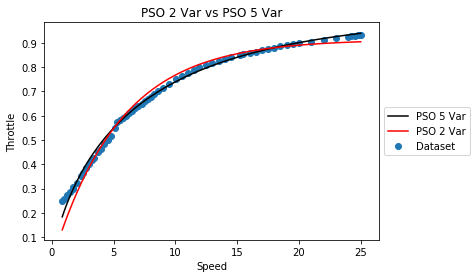

In [208]:
plt.title('PSO 2 Var vs PSO 5 Var')
plt.xlabel('Speed')
plt.ylabel('Throttle')
plt.plot(v0, ev_func_5(gp4), label='PSO 5 Var', color='k')
plt.plot(v0, ev_func(gp), label='PSO 2 Var', color='r')
plt.scatter(v0, u0, label='Dataset')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Day 9 - 10

The PSO algorithm will now be modified so that the function runs faster.

In [215]:
ev_func_jitted = njit(ev_func)
ev_func_5_jitted = njit(ev_func_5)
cost_jitted = njit(cost)

In [130]:
def PSO_nprint(func, n_param, particles, rng, iterate_max):
    # Define the constants
    w = 0.5
    c1 = 0.8
    c2 = 0.7
    iterate = 0
    
    # Setup the initial conditions for position and velocity arrays
    ppos_vector = np.random.uniform(0, rng, (particles, n_param))
    pbest_pos = ppos_vector
    pfit_value = np.ones(particles) * 1e100
    gbest_pos = np.zeros(n_param)
    gfit_value = 1e100
    pvel_vector = np.zeros((particles, n_param))
    
    # First loop for assigning the fitness value using the cost function
    for i in range(particles):
        # Check the position of individual and group value using the evaluation function
        cost_func = cost(func, ppos_vector[i])
        
        # Update each values using the cost functions
        if(pfit_value[i] > cost_func):
            pfit_value[i] = cost_func
            pbest_pos[i] = np.copy(ppos_vector[i])
                
        if(gfit_value > cost_func):
            gfit_value = cost_func
            gbest_pos = np.copy(ppos_vector[i])
                
        
        
    # Second loop for implementing the PSO Algorithm
    while (iterate < iterate_max):
        for i in range(particles):
            # Update the velocity and position vector
            pvel_vector[i] = w*pvel_vector[i] + c1*random.random()*(pbest_pos[i]-ppos_vector[i]) + c2*random.random()*(gbest_pos-ppos_vector[i])
            ppos_vector[i] = pvel_vector[i] + ppos_vector[i]
            
            cost_func = cost(func, ppos_vector[i])
            
            # Update each values using the cost functions
            if(pfit_value[i] > cost_func):
                pfit_value[i] = cost_func
                pbest_pos[i] = np.copy(ppos_vector[i])
                
            if(gfit_value > cost_func):
                gfit_value = cost_func
                gbest_pos = np.copy(ppos_vector[i])
                
        iterate = iterate+1
    
    return ppos_vector, gbest_pos

In [235]:
def PSO_jit(func, n_param, particles, rng, iterate_max):
    # Define the constants
    w = 0.5
    c1 = 0.8
    c2 = 0.7
    iterate = 0
    
    # Setup the initial conditions for position and velocity arrays
    ppos_vector = np.random.uniform(0, rng, (particles, n_param))
    pbest_pos = ppos_vector
    pfit_value = np.ones(particles) * 1e100
    gbest_pos = np.zeros(n_param)
    gfit_value = 1e100
    pvel_vector = np.zeros((particles, n_param))
    
    # First loop for assigning the fitness value using the cost function
    for i in range(particles):
        # Check the position of individual and group value using the evaluation function
        cost_func = cost_jitted(func, ppos_vector[i])
        
        # Update each values using the cost functions
        if(pfit_value[i] > cost_func):
            pfit_value[i] = cost_func
            pbest_pos[i] = np.copy(ppos_vector[i])
                
        if(gfit_value > cost_func):
            gfit_value = cost_func
            gbest_pos = np.copy(ppos_vector[i])
                
        
        
    # Second loop for implementing the PSO Algorithm
    while (iterate < iterate_max):
        for i in prange(particles):
            # Update the velocity and position vector
            pvel_vector[i] = w*pvel_vector[i] + c1*random.random()*(pbest_pos[i]-ppos_vector[i]) + c2*random.random()*(gbest_pos-ppos_vector[i])
            ppos_vector[i] = pvel_vector[i] + ppos_vector[i]
            
            cost_func = cost_jitted(func, ppos_vector[i])
            
            # Update each values using the cost functions
            if(pfit_value[i] > cost_func):
                pfit_value[i] = cost_func
                pbest_pos[i] = np.copy(ppos_vector[i])
        
        for i in range(particles):
            if(gfit_value > cost_func):
                gfit_value = cost_func
                gbest_pos = np.copy(ppos_vector[i])
                
        iterate = iterate+1
    
    return ppos_vector, gbest_pos

In [236]:
PSO_jitted = njit(PSO_jit)
# PSO_jitted_parallelized = njit(PSO_jit, parallel=True)

In [237]:
# Compile the function
_, _s = PSO_jitted(ev_func_jitted, 2, 2, 2, 2)
#_, _s = PSO_jitted_parallelized(ev_func_jitted, 2, 2, 2, 2)

In [238]:
%timeit pvj, gpj = PSO_jitted(ev_func_jitted, 2, 25, 2, 5000)
%timeit pv, gp = PSO_nprint(ev_func, 2, 25, 2, 5000)
#%timeit pvjp, gpjp = PSO_jitted_parallelized(ev_func_jitted, 2, 25, 2, 5000)

169 ms ± 5.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.56 s ± 440 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [224]:
PSO_jitted(ev_func_5_jitted, 5, 1000, 2, 1000)

(array([[ 1.00697726, -0.13399449,  1.98327896,  0.40013246, -0.03174372],
        [ 1.00697726, -0.13399449,  1.98327896,  0.40013246, -0.03174372],
        [ 1.00697726, -0.13399449,  1.98327896,  0.40013246, -0.03174372],
        ...,
        [ 1.00697726, -0.13399449,  1.98327896,  0.40013246, -0.03174372],
        [ 1.00697726, -0.13399449,  1.98327896,  0.40013246, -0.03174372],
        [ 1.00697726, -0.13399449,  1.98327896,  0.40013246, -0.03174372]]),
 array([ 1.00697726, -0.13399449,  1.98327896,  0.40013246, -0.03174372]))

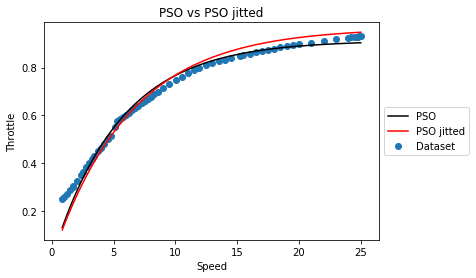

In [147]:
plt.title('PSO vs PSO jitted')
plt.xlabel('Speed')
plt.ylabel('Throttle')
plt.plot(v0, ev_func(gp), label='PSO', color='k')
plt.plot(v0, ev_func(gpj), label='PSO jitted', color='r')
plt.scatter(v0, u0, label='Dataset')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Day 11 - 12

## APSO Algorithm

APSO or Accelerated Particle Swarm Optimization is a method to accelerate the computation time of a normal PSO by only using the global value to update the postion and velocity vectors. By doing so, the time it takes to update the value would decrease because there's only one parameter that is always updated. The position vector update function is changed to

$$
x_{i} = (1 - \beta)x_{i} + \alpha\gamma^{iter}\varepsilon + \beta p_{g}
$$

The value of $\beta$, $\alpha$, and $\gamma$ are predetermined before the algorithm loop. The value of those three parameters changes how the function searches for a global best position for each particle. Whereas $\varepsilon$ is a random number distributed normally between 0 and 1.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import random
import math
from numba import njit, jit, prange
%matplotlib inline

Using the data that was used on testing the PSO, it will be used again to test the APSO

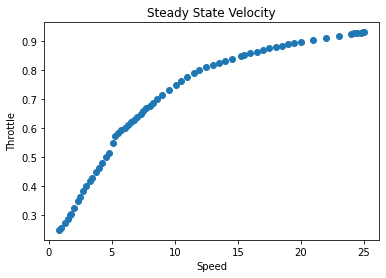

In [14]:
df = pd.read_csv("../projects/resources/steady_state_velocity.csv")
v0 = np.array(df.speed[1:])
u0 = np.array(df.throttle[1:])

plt.title('Steady State Velocity')
plt.xlabel('Speed')
plt.ylabel('Throttle')
plt.scatter(v0, u0)
plt.show()

In [64]:
def ev_func(beta):
    u = beta[0]*(1.0 - np.exp(beta[1]*v0))
    return u

In [57]:
def cost(beta):
    u = beta[0]*(1.0 - np.exp(beta[1]*v0))
    err = abs(u0 - u)
    if(beta[0] < 0):
        return np.inf
    if(beta[1] > 0):
        return np.inf
    else:
        return np.mean(err**2)

In [58]:
def APSO(costf, n_param, particles, rng, iterate_max):
    # Define the constants
    alpha0 = 0.5
    beta = 0.3
    gamma = 0.9
    iterate = 0
    
    # Setup the initial conditions for position and velocity arrays
    ppos_vector = np.random.uniform(-rng, rng, (particles, n_param))
    gbest_pos = np.zeros(n_param)
    gfit_value = 1e100
    
    # First loop for assigning the fitness value using the cost function
    for i in range(particles):
        # Check the position of individual and group value using the evaluation function
        cost_func = costf(ppos_vector[i])
        
        # Update the global value using the cost functions
        if(gfit_value > cost_func):
            gfit_value = np.copy(cost_func)
            gbest_pos = np.copy(ppos_vector[i])
            
    # Second loop for implementing the APSO Algorithm
    while (iterate < iterate_max):
        for i in range(particles):
            # Update the alpha value
            alpha = alpha0*gamma**iterate
            
            # Update the velocity and position vector
            ppos_vector[i] = (1-beta)*ppos_vector[i] + alpha*np.random.normal(0,1) + beta*gbest_pos
            
            cost_func = costf(ppos_vector[i])
            
            # Update the global value using the cost functions
            if(gfit_value > cost_func):
                gfit_value = np.copy(cost_func)
                gbest_pos = np.copy(ppos_vector[i])
                
        iterate = iterate+1
    
    return ppos_vector, gbest_pos

In [61]:
for i in range(5):
    pva, gpa = APSO(cost, 2, 100, 1, 2000)
    print(cost(gpa))
    print(gpa)

0.0009430688981932415
[ 0.91335408 -0.18326998]
0.0009431717755197728
[ 0.91287934 -0.18338245]
0.0009433232695765576
[ 0.91255379 -0.18345916]
0.0009518313842955534
[ 0.90821097 -0.18444925]
0.0009430719841135796
[ 0.91331625 -0.18327897]


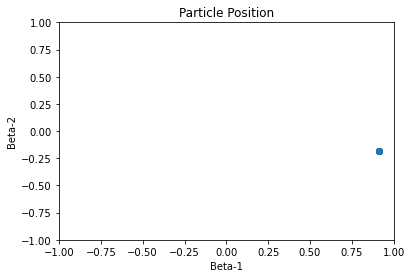

In [62]:
plt.title("Particle Position")
plt.xlabel("Beta-1")
plt.xlim(-1,1)
plt.ylabel("Beta-2")
plt.ylim(-1,1)
plt.scatter(pva[:,0], pva[:,1])
plt.show()

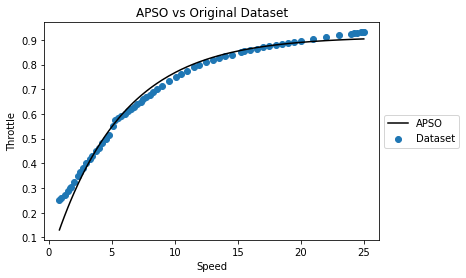

In [65]:
plt.title('APSO vs Original Dataset')
plt.xlabel('Speed')
plt.ylabel('Throttle')
plt.plot(v0, ev_func(gpa), label='APSO', color='k')
plt.scatter(v0, u0, label='Dataset')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [103]:
def ev_func_5(beta):
    u = beta[0]*(1.0 - np.exp(beta[1]*v0**(beta[2])+beta[3]*v0**beta[4]))
    return u

In [104]:
def cost5(c_func, beta):
    err = u0 - c_func(beta)
    if(beta[0] < 0):
        return np.inf
    if(beta[1] > 0):
        return np.inf
    if(beta[2] < 0):
        return np.inf
    if(beta[3] > 0):
        return np.inf
    if(beta[4] < 0):
        return np.inf
    return np.mean(err**2)

In [53]:
pva5, gpa5 = APSO(ev_func_5, cost5, 5, 50, 2, 1000)
print(cost(ev_func_5, gpa5))

NameError: name 'APSO' is not defined

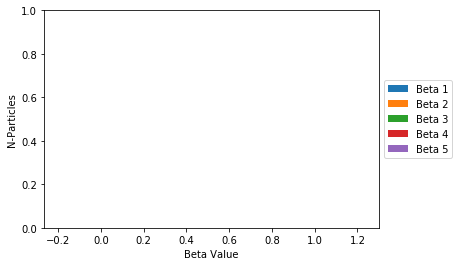

In [112]:
for i in range (5) :
    plt.hist(pva5[:,i], label=('Beta '+str(i+1)))

plt.ylabel("N-Particles")
plt.ylim(0,1)
plt.xlabel("Beta Value")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

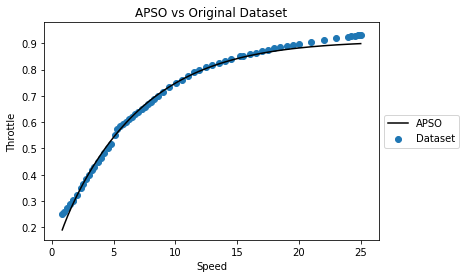

In [113]:
plt.title('APSO vs Original Dataset')
plt.xlabel('Speed')
plt.ylabel('Throttle')
plt.plot(v0, ev_func_5(gpa5), label='APSO', color='k')
plt.scatter(v0, u0, label='Dataset')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Day 13 - 14

## Stochastic Fractal Search

The Stochastic Fractal Search (SFS) finds values similarly to PSO by using multiple particles. The difference is that the SFS has two primary parts which are the diffusion part and the update part. The diffusion part finds the best particle value by using a gaussian distribution. Whereas the update part, updates the values two times by giving a probability value to each particle based on the fitness value of the particle to the cost function. The particles are created based on an upper and lower boundary ($UB$ and $LB$).

$$
P_{i} = LB + \varepsilon\space\times\space(UB - LB)
$$

The value of $\varepsilon$ is a random number that is normally distributed between 0 and 1.

### Diffusion

It can be seen in the function below that the particles that will be diffused are updated through either Gaussian Walks 1 (GW1) or GW2. The function for both type of Gaussian Walks are

$$
GW1 = Gaussian(\mu_{BP}, \sigma) + \varepsilon\space\times\space BP - \varepsilon'\space\times\space P_{i}
$$

$$
GW2 = Gaussian(\mu_{P}, \sigma)
$$

Again, the value of $\varepsilon$ and $\varepsilon'$ is a random number that is distributed normally between 0 and 1. The values for each variables in GW1 and GW2 are

$$
\mu_{BP} = \left|BP\right| \space\space\space\space\space \mu_{P} = \left|P_{i}\right|
$$

$$
\sigma = \left|\frac{log(g)}{g}\space\times\space(P_{i} - BP)\right|
$$

To be noted here from the equation above that the value of $BP$ is the best value from the particles $P_{i}$ that is chosen by applying a cost function. The value of $g$ is the number of iteration that was done during the diffusion.

In [79]:
def diffuse(part, n_diffuse, n_iter, p_walk):
    best_part = part[0]
    
    for i in range(n_diffuse):
        if(np.random.rand() < p_walk):
            # Set the values for GW1
            mu = abs(part[0])
            sigma = abs((np.log10(n_iter+1)/(n_iter+1))*(part-best_part))
            
            # Set the new particles
            part = np.random.normal(mu,sigma) + np.random.uniform()*best_part - np.random.uniform()*part
        else:
            # Set the values for GW2
            mu = abs(part[i])
            sigma = abs((np.log10(n_iter+1)/(n_iter+1))*(part-best_part))
                    
            # Set the new particles
            part = np.random.normal(mu,sigma)
            
    return part

## Sort

The function below is used to sort the particles based on the cost function.

In [74]:
def cost(beta):
    u = beta[0]*(1.0 - np.exp(beta[1]*v0))
    err = abs(u - u0)
    return np.mean(err)    

In [75]:
def sort_by_cost(part, c_func):
    sort_part = np.zeros([part.shape[0], part.shape[1] + 1])
    
    for i in range(part.shape[0]):
        if(part[i][0] < 0.0):
            sort_part[i] = part[i][0], part[i][1], np.inf
        if(part[i][1] > 0.0):
            sort_part[i] = part[i][0], part[i][1], np.inf
        else:
            sort_part[i] = part[i][0], part[i][1], c_func(part[i])
    
    sort_part = np.delete(sort_part[sort_part[:,-1].argsort()], -1, axis=1)
    
    return sort_part

## SFS Algorithm

Below is the main algorithm that is used to run the SFS algorithm. First the particles are diffused based on the diffusion function. Next, the function will be iterated until the max number of iterations. There are two value update that is done during the iteration. The sorted particles are given a probability value based on the position, where the best particle (first position) is given the highest probability. The probability that is given to each particles are

$$
Pa_{i} = \frac{i}{N}
$$

Where $i$ is the position of the particle and $N$ is the number of particles. The first value update is done to the particles that has a probability below $\varepsilon$ and it is done based on the equation below

$$
P'_{i} = P_{r} - \varepsilon\space\times\space(P_{t} - P_{i})
$$

From the equation, $P'_{i}$ is the particle $P_{i}$ after the first value update, $P_{r}$ and $P_{t}$ are randomly chosen particles from $P$. After the first update, the particles will be sorted again and given a corresponding probability value. The second update is done based on the equation below

* If the value of $\hat{\varepsilon} \leqslant 0.5$, the equation is

$$
P''_{t} = P'_{i} - \hat{\varepsilon} \space\times\space (P'_{t} - BP)
$$

* If the value of $\hat{\varepsilon} > 0.5$, the equation is 

$$
P''_{t} = P'_{i} + \hat{\varepsilon} \space\times\space (P'_{t} - P'_{r})
$$

Same as before $P'_{t}$ and $P'_{r}$ are randomly chosen particles from $P$. Whereas the value of $\hat{\varepsilon}$ is a random number that is distributed using the gaussian standard distribution.

In [80]:
def SFS(particles, param, ub, lb, iter_max, cost_func):
    # Initialize the variables
    part = np.zeros([particles, param])
    for i in range(part.shape[0]):
        for j in range(part.shape[1]):
            part[i][j] = lb + np.random.uniform()*(ub-lb)
            
    n_diffuse = 20
    p_walk = 0.5
    
    # Sort the particles before entering the loop
    part = sort_by_cost(part, cost_func)
    best_part = part[0]
    
    for g in range(iter_max):
        # Diffuse the particles
        part = diffuse(part, n_diffuse, g, p_walk)
        
        # Sort and find new best
        part = sort_by_cost(part, cost_func)
        best_part = part[0]
        
        # Create the probability for each particles
        size = part.shape[0]
        pa = np.array([(size - i)/size for i in range(size)])
        
        # First value update
        eps = np.random.uniform()
        for i in range(part.shape[0]):
            if(eps > pa[i]):
                for j in range(part.shape[1]):
                    # Update the position based on the equation
                    part[i][j] = np.random.choice(part[:,j]) - eps*(np.random.choice(part[:,j]) - np.copy(part[i][j]))
            else:
                part[i] = np.copy(part[i])
                    
        # Sort and find new best
        part = sort_by_cost(part, cost_func)
        best_part = part[0]
        
        # Second value update
        eps_ = np.random.normal()
        partt, partr = np.random.choice(part[:,j], 2)
        for i in range(part.shape[0]):
            if(eps_ > pa[i]):
                if(eps_ <= 0.5):
                    for j in range(part.shape[1]):
                        part[i][j] = np.copy(part[i][j]) - eps_*(partt - best_part[j])
                else:
                    for j in range(part.shape[1]):
                        part[i][j] = np.copy(part[i][j]) + eps_*(partt - partr)
            else:
                part[i][j] = np.copy(part[i][j])
        
        # Sort and find new best
        part = sort_by_cost(part, cost_func)
        best_part = part[0]
        print(cost(best_part), best_part)
    
    return part, best_part

In [84]:
part, best_part = SFS(30, 2, 1, -1, 50, cost)

407.49368867514323 [0.74441277 0.33830352]
43145.163956974124 [1.11710973 0.51848632]
420897702.02446264 [1.82042851 0.87619734]
1348983039.6903143 [2.85697737 0.90533261]
37243.05761931791 [1.41128481 0.50260564]
668110.8557472482 [1.85294997 0.61110425]
2063.0294454608124 [0.67088175 0.41223642]
2133127727.435145 [0.91680477 0.97034133]
19749.9306137277 [0.38869638 0.52990344]
475.3594138926741 [0.26261514 0.38966544]
137.67417044752625 [0.23572889 0.34096676]
2.6908947772088654 [0.12263184 0.18099451]
17.55784842070449 [0.16614219 0.26435192]
399.6685007084095 [0.23278319 0.38740068]
149164.55248946865 [0.39971675 0.61252352]
1167897118.9519305 [0.57830647 0.96457328]
94885.90318635396 [0.37761    0.59618354]
5284.042539301917 [0.30839409 0.48455255]
1469.619634233634 [0.26509417 0.43714732]
1117548897.7783983 [0.56381514 0.96381189]
618175424.1689041 [0.56146324 0.93985377]
4102053035037.572 [0.74879584 1.28586418]
297513954.59287745 [0.56111877 0.91006163]
254398448084749.34 [0.87

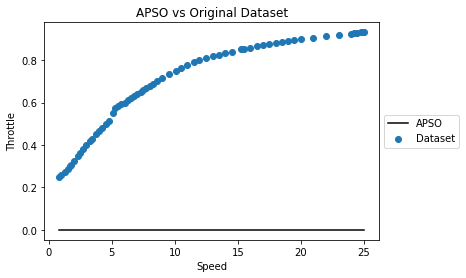

In [85]:
plt.title('APSO vs Original Dataset')
plt.xlabel('Speed')
plt.ylabel('Throttle')
plt.plot(v0, ev_func(best_part), label='APSO', color='k')
plt.scatter(v0, u0, label='Dataset')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Day 15

## PID Controller

PID Controller is a way to control a system automatically using three parameters. The three parameters are stated in the name itself, P for Proportional, I for Integral, and D for Derivative. Each of those parameters affects the system in a different way.

* The proportional part affects the output that the system gives when there are changes
* The integral part affects the steady state error of the system response
* The derivative part affects the speed of the system response due to changes

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import random
import math
from numba import njit, jit, prange
%matplotlib inline
import control as co
import ipywidgets as wg
from IPython.display import display

Consider the following transfer function.

$$
\displaystyle{G(s) = \frac{2}{s^3+3s^2+2s+1}}
$$

In [3]:
# Create the transfer function
sys = co.tf([2],[1, 3, 2, 1])

In [4]:
# Change from s-domain to state space
sys_ss = co.tf2ss(sys)
sys_ss

A = [[-3.  2. -1.]
 [-1.  0.  0.]
 [ 0. -1.  0.]]

B = [[-1.]
 [ 0.]
 [ 0.]]

C = [[ 0.  0. -2.]]

D = [[0.]]

In [5]:
A = np.array(sys_ss.A)
B = np.array(sys_ss.B)
C = np.array(sys_ss.C)
D = np.array(sys_ss.D)

def dynamics(x, u):
    # Apply the state space equation for x dot
    x_dot = np.ravel(np.dot(A, x))+ np.ravel(np.dot(B, u))
    
    return x_dot

In [25]:
def clamping_i(inp, min_, max_):
    max_clamp = max_/ki
    return np.clip(inp, min_, max_clamp)

In [80]:
def input_type(intype, gain, n_dat):
    if(intype == 'step'):
        return np.ones((n_dat, 1))*gain
    if(intype == 'ramp'):
        return np.linspace(0, gain, num=n_dat)

In [132]:
def PID_Control(intype, f, ti, tf, u, k, min_, max_):
    # Initialize the constants
    kp, ki, kd = k
    n = 1 + (tf-ti)*f
    t = np.linspace(ti, tf, n)
    u = input_type(intype, 6, t.shape[0])
    PID = np.copy(u)
    x0 = np.zeros((3, 1))
    P_ = np.zeros(n)
    I_ = np.zeros(n)
    D_ = np.zeros(n)
    err = np.zeros(n)
    
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))
    
    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))
    
    err[0] = abs(u[0] - y[0])
    
    # PID Loop
    for i in range(1, t.shape[0]):
         # Euler method to find the output of the function
        dt = t[i] - t[i-1]
        x[i] = x[i-1] + dt*dynamics(x[i-1], PID[i-1])
        y[i] = np.ravel(np.dot(C, x[i])) + np.ravel(np.dot(D, PID[i]))
        
        # Count the mean square error
        err[i] = abs(u[i] - y[i])
        
        # PID value set
        P_[i] = kp*err[i]
        
        # Saturation limit check for integrator
        if (PID[i] != clamping_i(PID[i], min_, max_)) :
            if (PID[i] > 0 and err[i] > 0) :
                I_[i] = max(min(I_[i], max_), min_)
            if (PID[i] < 0 and err[i] < 0) :
                I_[i] = 0
        else:
            I_[i] = I_[i] + ki*err[i]*dt
        
        D_[i] = kd*(err[i] - err[i-1])/dt
        PID[i] = P_[i] + I_[i] + D_[i]
        
        PID[i] = P_[i] + I_[i] + D_[i]
        
        # Range for control output
        if(PID[i] >= 10):
            PID[i] = 10.0
        if(PID[i] < 0):
            PID[i] = 0.0
    
    return t, y, PID, err, u

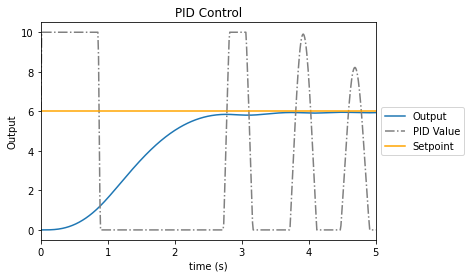

In [146]:
kp = 35.0
ki = 30.0
kd = 50.0

k = np.array([kp, ki, kd])

t_, y_, PID_, err_, u_ = PID_Control('step', 100, 0, 20, 6, k, 0, 2)

plt.title("PID Control")
plt.xlim(0, 5)
plt.xlabel("time (s)")
plt.ylabel("Output")
plt.plot(t_, y_, label='Output')
plt.plot(t_, PID_, label='PID Value', color='gray', linestyle='-.')
plt.plot(t_, u_, label='Setpoint', color='orange')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Day 16 - 19

## Brain Storm Optimization Algorithm

Brain Storm Optimization or the BSO is an optimization algorithm much like the PSO but the general concept here is to mimic the brainstorming process that humans do. The algorithm creates n-ideas as a potential output to choose as the best cost value. The multiple ideas will be clusterized using K Means to create brainstorming groups. Each group will then be evaluated to find the best potential idea as the cluster center. Next, the clusters and ideas will be updated by generating new ideas using multiple functions as the main BSO loop.

Steps:

* Generate n-ideas
* Clusterize the ideas to m clusters
* Check the probability of evaluating one cluster or two cluster centers by giving a probability (p_one)
* If one cluster was chosen then:
    * Give another probability (p_one_center) to use the cluster center or a random idea to update the value
        * If the cluster center was chosen:
        $$
        X_{new}^{i} = X_{center}
        $$
        
        * If a random idea was chosen:
        $$
        X_{new}^{i} = X_{random}
        $$
        
* If two clusters were chosen then:
    * Give another probability (p_two_center) to use the cluster center or a random idea from both clusters to update the value
        * If the cluster centers were chosen:
        $$
        X_{new}^{i} = (randint) \space\times\space X_{center}^{1} + (1-randint) \space\times\space X_{center}^{2} 
        $$
        
        * If random ideas were chosen:
        $$
        X_{new}^{i} = (randint) \space\times\space X_{random}^{1} + (1-randint) \space\times\space X_{random}^{2} 
        $$
        
* After n-ideas are generated then the new ideas will be updated using the function below
$$
X_{updated} = X_{new} + \xi \space\times\space (randnorm)
$$

* The value of $\xi$ is
$$
\xi = logsig\left(\frac{0.5 \space\times\space max_{iterate} - iterate}{iterate}\right)
$$

* The updated ideas will be evaluated, if the updated idea has better cost value then the updated ideas will be used
* Ideas will be generated for a number of times until max_iterate is reached
* Three cluster centers will be chosen from the last idea generated and will be evaluated to choose as the output of the algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import random
import math
from numba import njit, jit, prange
%matplotlib inline
import control as co
import ipywidgets as wg
from IPython.display import display
from sklearn.cluster import KMeans

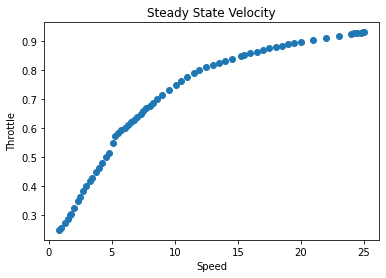

In [2]:
df = pd.read_csv("../projects/resources/steady_state_velocity.csv")
v0 = np.array(df.speed[1:])
u0 = np.array(df.throttle[1:])

plt.title('Steady State Velocity')
plt.xlabel('Speed')
plt.ylabel('Throttle')
plt.scatter(v0, u0)
plt.show()

In [6]:
def cost(beta):
    u = beta[0]*(1.0 - np.exp(beta[1]*v0))
    err = abs(u - u0)
    return np.mean(err**2)

In [7]:
def ev_func(beta):
    u = beta[0]*(1.0 - np.exp(beta[1]*v0))
    return u

In [8]:
def cluster_center(clust, c_func):
    ranked = np.zeros([clust.shape[0], clust.shape[1] + 1])
    
    for i in range(clust.shape[0]):
        for j in range(clust.shape[1]):
            ranked[i][j] = clust[i][j]
        ranked[i][j+1] = c_func(clust[i])
    
    ranked = np.delete(ranked[ranked[:,-1].argsort()], -1, axis=1)
    
    return ranked[0]

In [9]:
def logsig(x):
    return 1 / (1 + math.exp(-x))

The full BSO algorithm

In [10]:
def BSO(n_ideas, n_param, lb, ub, max_iterate, c_func):
    # Define initial parameters
    ideas = np.random.uniform(lb, ub, (n_ideas, n_param))
    Km = KMeans(n_clusters=3, max_iter=100)
    iterate = 0
    k = 20
    new_ideas = np.zeros([n_ideas, n_param])
    
    # Define the probabilities
    p_one = 0.8
    p_one_center = 0.4
    p_two_center = 0.5
    
    # Main BSO Loop
    while(iterate < max_iterate):
        # Clusterize the ideas
        cluster = Km.fit_predict(ideas)
        cl1 = ideas[cluster == 0]
        cl2 = ideas[cluster == 1]
        cl3 = ideas[cluster == 2]
        clusters = [cl1, cl2, cl3]
        
        # Generate n new ideas
        for i in range(ideas.shape[0]):
            # New idea based on one cluster
            if np.random.random() < p_one:
                cl_selected = random.choice(clusters)
                cl_selected_center = cluster_center(cl_selected,  c_func)
                
                # Use the previous cluster center
                if np.random.random() < p_one_center:
                    new_ideas[i] = cl_selected_center
                
                # Use random idea in a cluster
                else:
                    new_ideas[i] = random.choice(cl_selected)
            
            # New idea based on two cluster
            else:
                cl_selected1, cl_selected2 = random.sample(clusters, 2)
                cl_selected_center1 = cluster_center(cl_selected1, c_func)
                cl_selected_center2 = cluster_center(cl_selected2, c_func)
                rand = np.random.random()
                
                # Use the combination of two previous cluster centers
                if np.random.random() < p_two_center:
                    new_ideas[i] = rand*cl_selected_center1 + (1-rand)*cl_selected_center2
                    
                # Use two random ideas in a cluster
                else:
                    new_ideas[i] = rand*random.choice(cl_selected1) + (1-rand)*random.choice(cl_selected2)
    
            eps = logsig((0.5*max_iterate - iterate)/k)
            upd_new_ideas = np.copy(new_ideas[i]) + eps*np.random.normal(0, 1)
            
            if(c_func(upd_new_ideas) < c_func(new_ideas[i])):
                new_ideas[i] = upd_new_ideas
        
        ideas = new_ideas
        iterate = iterate + 1
        print("Iteration: ", iterate)
    
    # Reclusterize ideas
    cluster = Km.fit_predict(ideas)
    cl1 = ideas[cluster == 0]
    cl2 = ideas[cluster == 1]
    cl3 = ideas[cluster == 2]
    clusters = np.array([cl1, cl2, cl3])
    
    # Choose the best cluster center for the output
    for i in range(clusters.shape[0]):
        cl1_center = cluster_center(cl1, c_func)
        cl2_center = cluster_center(cl2, c_func)
        cl3_center = cluster_center(cl3, c_func)
    
    possible_ideas = np.array([cl1_center, cl2_center, cl3_center])
    
    return cluster_center(possible_ideas, c_func)

In [8]:
idea = BSO(25, 2, -1.5, 1.5, 40, cost)
print(idea)
print(cost(idea))

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
[ 0.90713224 -0.18102822]
0.0009970709272922116


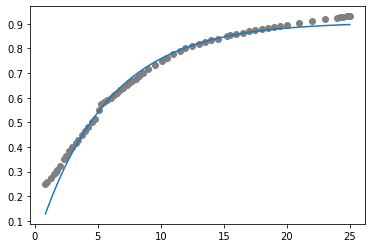

In [9]:
plt.scatter(v0, u0, color="gray")
plt.plot(v0, ev_func(idea))
plt.show()

# Day 20 - 22

## PID Control for Algorithm Implementation

In this section, the PID Control function will be modified so that it can be used as a cost function for the algorithms that have been made. The difference between the PID_Control function here and before is that the time and input array are both defined before entering the loop as a global parameter. This is done to ensure that there will be no iteration for defining those parameters. The cost function used for the algorithms are the mean error that are obtained from the PID control loop.

In [11]:
def clamping_i(inp, ki, min_, max_):
    max_clamp = max_/ki
    return np.clip(inp, min_, max_clamp)

In [12]:
def input_type(intype, gain, n_dat):
    if(intype == 'step'):
        return np.ones((n_dat, 1))*gain
    if(intype == 'ramp'):
        return np.linspace(0, gain, num=n_dat)

In [13]:
def time_range(f, ti, tf):
    n = 1 + (tf-ti)*f
    t = np.linspace(ti, tf, n)
    return n, t

In [14]:
def PID_Control(k, min_, max_):
    # Initialize the constants
    kp, ki, kd = k
    # n = 1 + (tf-ti)*f
    # t = np.linspace(ti, tf, n)
    # u = input_type(intype, 6, t.shape[0])
    PID = np.copy(u)
    x0 = np.zeros((3, 1))
    P_ = np.zeros(n)
    I_ = np.zeros(n)
    D_ = np.zeros(n)
    err = np.zeros(n)
    
    x = np.empty((t.shape[0], x0.shape[0]))
    y = np.empty((t.shape[0], C.shape[0]))
    
    x[0] = np.ravel(x0)
    y[0] = np.ravel(np.dot(C, x[0])) + np.ravel(np.dot(D, u[0]))
    
    err[0] = abs(u[0] - y[0])
    
    # PID Loop
    for i in range(1, t.shape[0]):
         # Euler method to find the output of the function
        dt = t[i] - t[i-1]
        x[i] = x[i-1] + dt*dynamics(x[i-1], PID[i-1])
        y[i] = np.ravel(np.dot(C, x[i])) + np.ravel(np.dot(D, PID[i]))
        
        # Count the mean square error
        err[i] = abs(u[i] - y[i])
        
        # PID value set
        P_[i] = kp*err[i]
        
        # Saturation limit check for integrator
        if (PID[i] != clamping_i(PID[i], ki, min_, max_)) :
            if (PID[i] > 0 and err[i] > 0) :
                I_[i] = max(min(I_[i], max_), min_)
            if (PID[i] < 0 and err[i] < 0) :
                I_[i] = 0
        else:
            I_[i] = I_[i] + ki*err[i]*dt
        
        D_[i] = kd*(err[i] - err[i-1])/dt
        PID[i] = P_[i] + I_[i] + D_[i]
        
        PID[i] = P_[i] + I_[i] + D_[i]
        
        # Range for control output
        if(PID[i] >= 10):
            PID[i] = 10.0
        if(PID[i] < 0):
            PID[i] = 0.0
    
    return t, y, PID, err, u

## PID Test using BSO Algorithm

In [15]:
n, t = time_range(100, 0, 20)
u = input_type('step', 6, t.shape[0])

In [16]:
def PIDcost(k):
    t_, y_, PID_, err_, u_ = PID_Control(k, 0, 3)
    return np.mean(err_)

In [19]:
idea = BSO(25, 3, 0, 100, 10, PIDcost)

Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10


In [20]:
t_, y_, PID_, err_, u_ = PID_Control(idea, 0, 3)

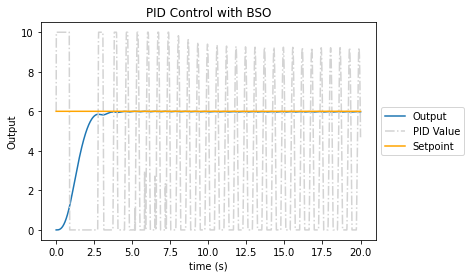

In [38]:
plt.title("PID Control with BSO")
#plt.xlim(0,5)
plt.xlabel("time (s)")
plt.ylabel("Output")
plt.plot(t_, y_, label='Output')
plt.plot(t_, PID_, label='PID Value', color='lightgray', linestyle='-.')
plt.plot(t_, u_, label='Setpoint', color='orange')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## PID Test using PSO Algorithm

In [23]:
def PSO(c_func, n_param, particles, lb, ub, iterate_max):
    # Define the constants
    w = 0.5
    c1 = 0.8
    c2 = 0.7
    iterate = 0
    
    # Setup the initial conditions for position and velocity arrays
    ppos_vector = np.random.uniform(lb, ub, (particles, n_param))
    pbest_pos = ppos_vector
    pfit_value = np.ones(particles) * 1e100
    gbest_pos = np.zeros(n_param)
    gfit_value = 1e100
    pvel_vector = np.zeros((particles, n_param))
    
    # First loop for assigning the fitness value using the cost function
    for i in range(particles):
        # Check the position of individual and group value using the evaluation function
        cost_func = c_func(ppos_vector[i])
        
        # Update each values using the cost functions
        if(pfit_value[i] > cost_func):
            pfit_value[i] = cost_func
            pbest_pos[i] = np.copy(ppos_vector[i])
                
        if(gfit_value > cost_func):
            gfit_value = cost_func
            gbest_pos = np.copy(ppos_vector[i])
        
    # Second loop for implementing the PSO Algorithm
    while (iterate < iterate_max):
        for i in range(particles):
            # Update the velocity and position vector
            pvel_vector[i] = w*pvel_vector[i] + c1*random.random()*(pbest_pos[i]-ppos_vector[i]) + c2*random.random()*(gbest_pos-ppos_vector[i])
            ppos_vector[i] = pvel_vector[i] + ppos_vector[i]
            
            cost_func = c_func(ppos_vector[i])
            
            # Update each values using the cost functions
            if(pfit_value[i] > cost_func):
                pfit_value[i] = cost_func
                pbest_pos[i] = np.copy(ppos_vector[i])
                
            if(gfit_value > cost_func):
                gfit_value = cost_func
                gbest_pos = np.copy(ppos_vector[i])
        
        iterate = iterate+1
        print("Iteration: ", iterate, " | Global best cost: ", c_func(gbest_pos))
    
    print(c_func(gbest_pos))
    print("The best position for each parameter: ", gbest_pos, " with ", iterate, " iteration.")
    return ppos_vector, gbest_pos

In [24]:
swarm = PSO(PIDcost, 3, 25, 0, 100, 100)

Iteration:  1  | Global best cost:  0.4760792127456655
Iteration:  2  | Global best cost:  0.4760792127456655
Iteration:  3  | Global best cost:  0.4760792127456655
Iteration:  4  | Global best cost:  0.4735283303070182
Iteration:  5  | Global best cost:  0.4735283303070182
Iteration:  6  | Global best cost:  0.47284528342423787
Iteration:  7  | Global best cost:  0.47148434628324903
Iteration:  8  | Global best cost:  0.47148434628324903
Iteration:  9  | Global best cost:  0.47144833966056454
Iteration:  10  | Global best cost:  0.4695637183013534
Iteration:  11  | Global best cost:  0.4695637183013534
Iteration:  12  | Global best cost:  0.46874097845539936
Iteration:  13  | Global best cost:  0.4681569419977209
Iteration:  14  | Global best cost:  0.4681569419977209
Iteration:  15  | Global best cost:  0.4681569419977209
Iteration:  16  | Global best cost:  0.4681569419977209
Iteration:  17  | Global best cost:  0.4681569419977209
Iteration:  18  | Global best cost:  0.4681569419977

In [25]:
t_1, y_1, PID_1, err_1, u_1 = PID_Control(swarm[1], 0, 3)

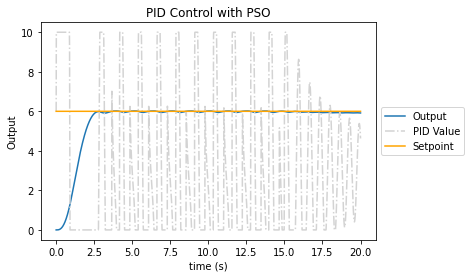

In [39]:
plt.title("PID Control with PSO")
#plt.xlim(0,5)
plt.xlabel("time (s)")
plt.ylabel("Output")
plt.plot(t_1, y_1, label='Output')
plt.plot(t_1, PID_1, label='PID Value', color='lightgray', linestyle='-.')
plt.plot(t_1, u_1, label='Setpoint', color='orange')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## PID Test with APSO Algorithm

In [29]:
def APSO(c_func, n_param, particles, lb, ub, iterate_max):
    # Define the constants
    alpha0 = 0.5
    beta = 0.3
    gamma = 0.9
    iterate = 0
    
    # Setup the initial conditions for position and velocity arrays
    ppos_vector = np.random.uniform(lb, ub, (particles, n_param))
    gbest_pos = np.zeros(n_param)
    gfit_value = 1e100
    
    # First loop for assigning the fitness value using the cost function
    for i in range(particles):
        # Check the position of individual and group value using the evaluation function
        cost_func = c_func(ppos_vector[i])
        
        # Update the global value using the cost functions
        if(gfit_value > cost_func):
            gfit_value = np.copy(cost_func)
            gbest_pos = np.copy(ppos_vector[i])
            
    # Second loop for implementing the APSO Algorithm
    while (iterate < iterate_max):
        for i in range(particles):
            # Update the alpha value
            alpha = alpha0*gamma**iterate
            
            # Update the velocity and position vector
            ppos_vector[i] = (1-beta)*ppos_vector[i] + alpha*np.random.normal(0,1) + beta*gbest_pos
            
            cost_func = c_func(ppos_vector[i])
            
            # Update the global value using the cost functions
            if(gfit_value > cost_func):
                gfit_value = np.copy(cost_func)
                gbest_pos = np.copy(ppos_vector[i])
        
        iterate = iterate+1
        print("Iteration: ", iterate, " | Global best cost: ", c_func(gbest_pos))
    
    return ppos_vector, gbest_pos

In [30]:
aswarm = APSO(PIDcost, 3, 25, 0, 100, 100)

Iteration:  1  | Global best cost:  0.47597398479330183
Iteration:  2  | Global best cost:  0.47489420301947344
Iteration:  3  | Global best cost:  0.47332496729837326
Iteration:  4  | Global best cost:  0.4728452551968094
Iteration:  5  | Global best cost:  0.4728452551968094
Iteration:  6  | Global best cost:  0.47273850528092953
Iteration:  7  | Global best cost:  0.47052978552700564
Iteration:  8  | Global best cost:  0.47052978552700564
Iteration:  9  | Global best cost:  0.45870759255099247
Iteration:  10  | Global best cost:  0.45870759255099247
Iteration:  11  | Global best cost:  0.45870759255099247
Iteration:  12  | Global best cost:  0.45870759255099247
Iteration:  13  | Global best cost:  0.45851742007613533
Iteration:  14  | Global best cost:  0.45851742007613533
Iteration:  15  | Global best cost:  0.45851742007613533
Iteration:  16  | Global best cost:  0.45613008709304903
Iteration:  17  | Global best cost:  0.45613008709304903
Iteration:  18  | Global best cost:  0.456

In [31]:
t_2, y_2, PID_2, err_2, u_2 = PID_Control(aswarm[1], 0, 3)

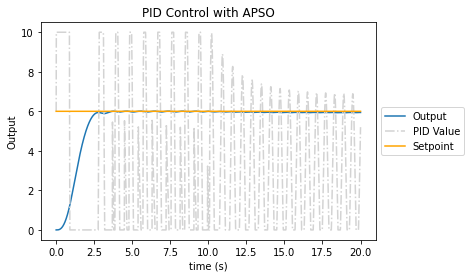

In [40]:
plt.title("PID Control with APSO")
#plt.xlim(0,5)
plt.xlabel("time (s)")
plt.ylabel("Output")
plt.plot(t_2, y_2, label='Output')
plt.plot(t_2, PID_2, label='PID Value', color='lightgray', linestyle='-.')
plt.plot(t_2, u_2, label='Setpoint', color='orange')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## PID Output Comparison for BSO, PSO, and APSO

Value Comparison

In [33]:
print("Value of Kp, Ki, Kd for")
print("BSO: ", idea, " | Error: ", np.mean(err_))
print("PSO: ", swarm[1], " | Error: ", np.mean(err_1))
print("APSO: ", aswarm[1], " | Error: ", np.mean(err_2))

Value of Kp, Ki, Kd for
BSO:  [55.41893263 67.28781768 79.84074464]  | Error:  0.4420777451028638
PSO:  [35.2961371  36.61519742 48.17387346]  | Error:  0.4416825975523829
APSO:  [44.17607426 93.88490059 61.53244478]  | Error:  0.4475776034411753


Graphical Comparison

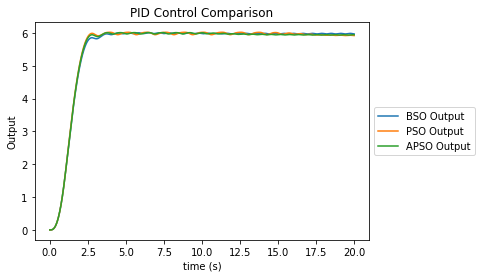

In [34]:
plt.title("PID Control Comparison")
plt.xlabel("time (s)")
plt.ylabel("Output")
plt.plot(t_, y_, label='BSO Output')
plt.plot(t_1, y_1, label='PSO Output')
plt.plot(t_2, y_2, label='APSO Output')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

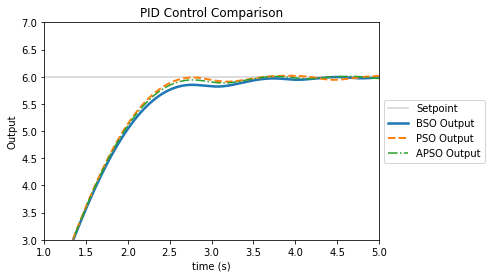

In [35]:
plt.title("PID Control Comparison")
plt.xlim(1, 5)
plt.ylim(3, 7)
plt.xlabel("time (s)")
plt.ylabel("Output")
plt.plot(t_, u_, label='Setpoint', color='lightgray')
plt.plot(t_, y_, label='BSO Output', linewidth=2.5)
plt.plot(t_1, y_1, label='PSO Output', linestyle='--', lw=2)
plt.plot(t_2, y_2, label='APSO Output',linestyle='-.')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()